<a href="https://colab.research.google.com/github/deltaC/LegBiomechanics/blob/main/Reverse_pendulum_back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.9
b = 0.3
t_0 = 0
t_finish = 30
delta_t = 0.0001

n = int((t_finish - t_0) / delta_t) + 1
t = np.linspace(t_0, t_finish, n)

x_1 = np.zeros(n)
x_2 = np.zeros(n)
x_1[0] = np.pi / 12
x_1_f = np.pi / 3
x_2[0] = 0

In [7]:
reached_x1_f = False
for i in range(n - 1):
    if not reached_x1_f:
        x_1_next = x_1[i] + delta_t * x_2[i]
        x_2_next = x_2[i] + delta_t * (a * np.sin(x_1[i]))

        if x_1_next >= x_1_f:
            reached_x1_f = True
            x_1_next = x_1_f
            x_2_next = 0  # не знаю можно ли что-то оптимальней брать
    else:
        x_1_next = x_1[i] + delta_t * x_2[i]
        x_2_next = x_2[i] + delta_t * (- a * np.sin(x_1[i]))
        if x_1_next == 0:
            x_1_next = x_1[i] + delta_t * x_2[i]
            x_2_next = x_2[i] + delta_t * (a * np.sin(x_1[i]))

    x_1[i + 1] = x_1_next
    x_2[i + 1] = x_2_next

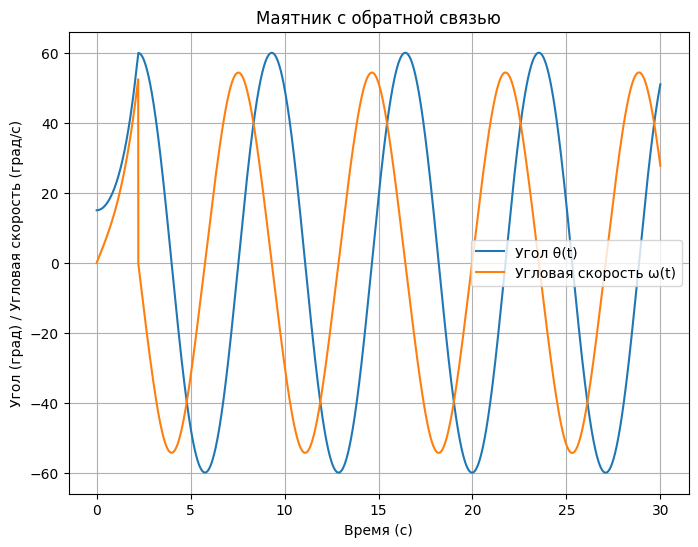

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(t, x_1 * 180 / np.pi, label="Угол θ(t)")
plt.plot(t, x_2 * 180 / np.pi, label="Угловая скорость ω(t)")
plt.xlabel("Время (с)")
plt.ylabel("Угол (град) / Угловая скорость (град/с)")
plt.title("Маятник с обратной связью")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
x_1 = np.zeros(n)
x_2 = np.zeros(n)
x_1[0] = np.pi / 12
x_1_f = np.pi / 3
x_2[0] = 0

In [11]:
reached_x1_f = False
for i in range(n - 1):
    if not reached_x1_f:
        x_1_next = x_1[i] + delta_t * x_2[i]
        x_2_next = x_2[i] + delta_t * (a * np.sin(x_1[i]))

        if x_1_next >= x_1_f:
            reached_x1_f = True
            x_1_next = x_1_f
            x_2_next = 0
    else:
        x_1_next = x_1[i] + delta_t * x_2[i]
        x_2_next = x_2[i] + delta_t * (-b * x_2[i] - a * np.sin(x_1[i]))
        if x_1_next == 0:
            x_1_next = x_1[i] + delta_t * x_2[i]
            x_2_next = x_2[i] + delta_t * (-b * x_2[i] + a * np.sin(x_1[i]))

    x_1[i + 1] = x_1_next
    x_2[i + 1] = x_2_next

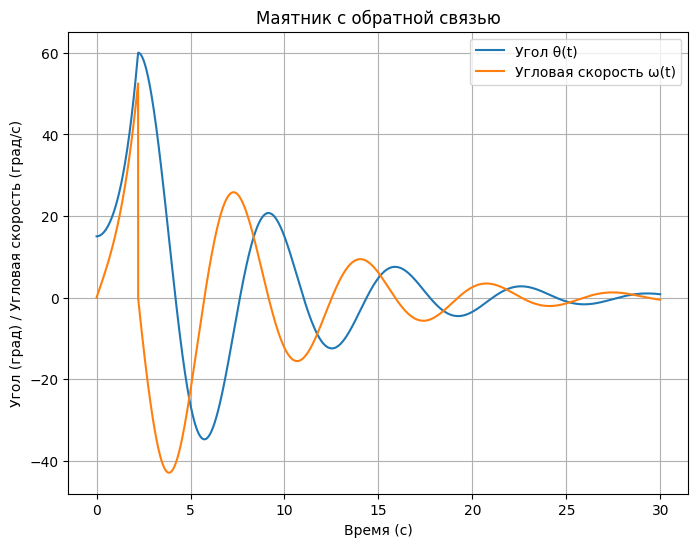

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(t, x_1 * 180 / np.pi, label="Угол θ(t)")
plt.plot(t, x_2 * 180 / np.pi, label="Угловая скорость ω(t)")
plt.xlabel("Время (с)")
plt.ylabel("Угол (град) / Угловая скорость (град/с)")
plt.title("Маятник с обратной связью")
plt.legend()
plt.grid(True)
plt.show()